{'00000001': 100}


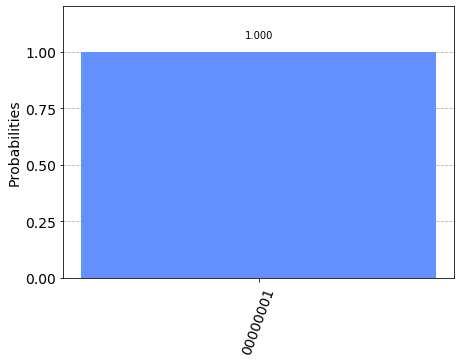

In [8]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
%matplotlib inline

from qiskit.visualization import *
simulator = Aer.get_backend('qasm_simulator')

qi=QuantumRegister(3)
qb=QuantumRegister(1)
qx=QuantumRegister(3)
qo=QuantumRegister(8)
c=ClassicalRegister(8)

circuit=QuantumCircuit(qi,qx,qb,qo,c)

def fun_or(qc,q0,q1,q2):
    qc.x(q0)
    qc.x(q1)
    qc.ccx(q0,q1,q2)
    qc.x(q2)
    qc.x(q1)
    qc.x(q0)

def or_3(qc,q0,q1,q2,b,q3):
    fun_or(qc,q0,q1,b)
    fun_or(qc,b,q2,q3)
    qc.reset(b)

    
circuit.x(qi[2])
circuit.x(qi[1])
circuit.x(qi[0])
 
for i in range(0,3):
    circuit.cx(qi[i],qx[i])
    circuit.x(qx[i])
    
or_3(circuit,qx[0],qx[1],qx[2],qb[0],qo[7])
or_3(circuit,qi[0],qx[1],qx[2],qb[0],qo[6])
or_3(circuit,qx[0],qi[1],qx[2],qb[0],qo[5])
or_3(circuit,qi[0],qi[1],qx[2],qb[0],qo[4])
or_3(circuit,qx[0],qx[1],qi[2],qb[0],qo[3])
or_3(circuit,qi[0],qx[1],qi[2],qb[0],qo[2])
or_3(circuit,qx[0],qi[1],qi[2],qb[0],qo[1])
or_3(circuit,qi[0],qi[1],qi[2],qb[0],qo[0])

for i in range(0,8):
    circuit.x(qo[i])
    


circuit.measure(qo[7],c[0])
circuit.measure(qo[6],c[1])
circuit.measure(qo[5],c[2])
circuit.measure(qo[4],c[3])
circuit.measure(qo[3],c[4])
circuit.measure(qo[2],c[5])
circuit.measure(qo[1],c[6])
circuit.measure(qo[0],c[7])


job = execute(circuit,simulator,shots=100)
result=job.result()
counts = result.get_counts(circuit)

print(counts)

plot_histogram(counts)
    
 


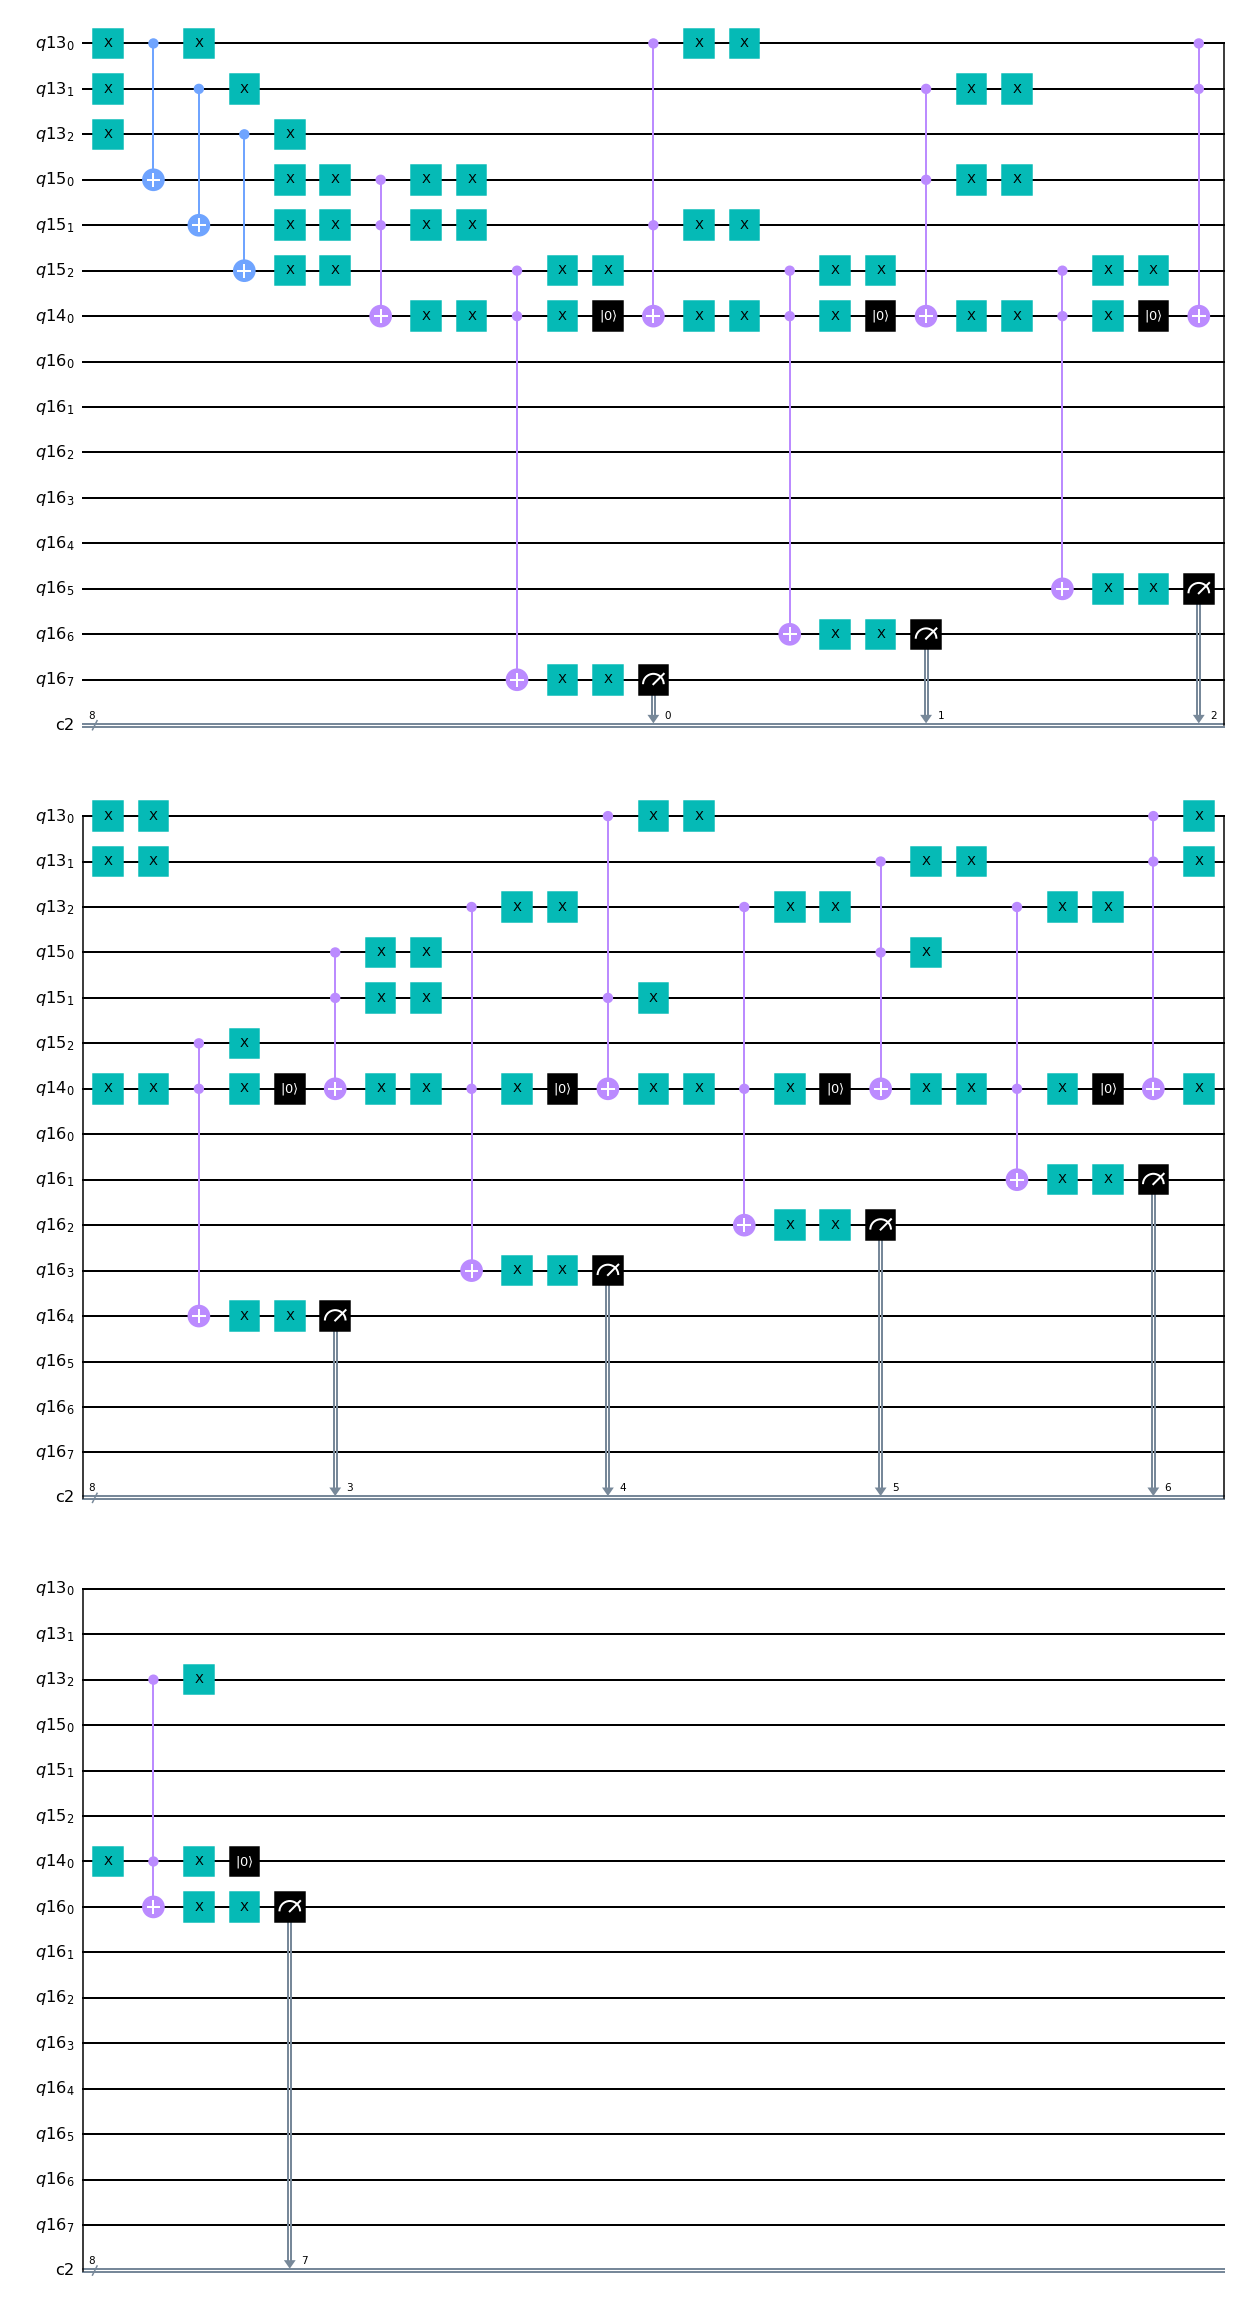

In [9]:
circuit.draw(output="mpl")